In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 7

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.0193 - accuracy: 0.1905 - val_loss: 2.0407 - val_accuracy: 0.0690

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
1/1 [==============================] - 0s 85ms/step - loss: 1.9573 - accuracy: 0.1786 - val_loss: 2.0377 - val_accuracy: 0.0690

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
1/1 [==============================] - 0s 92ms/step - loss: 1.9852 - accuracy: 0.1429 - val_loss: 2.0347 - val_accuracy: 0.0690

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
1/1 [==============================] - 0s 85ms/step - loss: 1.9913 - accuracy: 0.0833 - val_loss: 2.0321 - val_accuracy: 0.0690

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
1/1 [==============================] - 0s 84ms/step - loss: 1.9853 - accuracy: 0.1429 - val_loss: 2.0

1/1 [==============================] - 0s 54ms/step - loss: 1.8810 - accuracy: 0.2500 - val_loss: 1.9511 - val_accuracy: 0.1379

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.8622 - accuracy: 0.2381 - val_loss: 1.9487 - val_accuracy: 0.1379

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8997 - accuracy: 0.2262 - val_loss: 1.9465 - val_accuracy: 0.1379

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8808 - accuracy: 0.2381 - val_loss: 1.9442 - val_accuracy: 0.1379

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8837 - accuracy: 0.2619 - val_loss: 1.9419 - v


Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8207 - accuracy: 0.2976 - val_loss: 1.8964 - val_accuracy: 0.1724

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.8295 - accuracy: 0.2262 - val_loss: 1.8958 - val_accuracy: 0.1724

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.8238 - accuracy: 0.2500 - val_loss: 1.8950 - val_accuracy: 0.1724

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.7911 - accuracy: 0.3214 - val_loss: 1.8941 - val_accuracy: 0.1724

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
1/1 [========

1/1 [==============================] - 0s 71ms/step - loss: 1.7411 - accuracy: 0.3333 - val_loss: 1.8432 - val_accuracy: 0.2069

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
1/1 [==============================] - 0s 266ms/step - loss: 1.7502 - accuracy: 0.2976 - val_loss: 1.8416 - val_accuracy: 0.2069

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
1/1 [==============================] - 0s 163ms/step - loss: 1.7535 - accuracy: 0.3214 - val_loss: 1.8400 - val_accuracy: 0.2069

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
1/1 [==============================] - 0s 105ms/step - loss: 1.7143 - accuracy: 0.2976 - val_loss: 1.8384 - val_accuracy: 0.2069

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
1/1 [==============================] - 0s 163ms/step - loss: 1.7151 - accuracy: 0.3333 - val_loss: 1.


Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.6853 - accuracy: 0.3333 - val_loss: 1.7921 - val_accuracy: 0.2414

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.6570 - accuracy: 0.3571 - val_loss: 1.7904 - val_accuracy: 0.2414

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.6281 - accuracy: 0.3929 - val_loss: 1.7883 - val_accuracy: 0.2414

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.6880 - accuracy: 0.3452 - val_loss: 1.7865 - val_accuracy: 0.2414

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
1/1 [===

1/1 [==============================] - 0s 76ms/step - loss: 1.5462 - accuracy: 0.4048 - val_loss: 1.7148 - val_accuracy: 0.3103

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.6164 - accuracy: 0.3929 - val_loss: 1.7121 - val_accuracy: 0.3103

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.5785 - accuracy: 0.4048 - val_loss: 1.7095 - val_accuracy: 0.3103

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.5852 - accuracy: 0.4048 - val_loss: 1.7068 - val_accuracy: 0.3103

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.6042 - accuracy: 0.3929 - val_loss: 1.7043


Epoch 00220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 221/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.6023 - accuracy: 0.3929 - val_loss: 1.6121 - val_accuracy: 0.4138

Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
1/1 [==============================] - 0s 75ms/step - loss: 1.5366 - accuracy: 0.3929 - val_loss: 1.6080 - val_accuracy: 0.4138

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
1/1 [==============================] - 0s 66ms/step - loss: 1.5742 - accuracy: 0.3929 - val_loss: 1.6044 - val_accuracy: 0.4138

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.4397 - accuracy: 0.4643 - val_loss: 1.6010 - val_accuracy: 0.4138

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
1/1 [===

1/1 [==============================] - 0s 67ms/step - loss: 1.3615 - accuracy: 0.5238 - val_loss: 1.4868 - val_accuracy: 0.4138

Epoch 00257: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 258/1000
1/1 [==============================] - 0s 78ms/step - loss: 1.4181 - accuracy: 0.4643 - val_loss: 1.4831 - val_accuracy: 0.4138

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.5168 - accuracy: 0.4167 - val_loss: 1.4802 - val_accuracy: 0.4138

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.4813 - accuracy: 0.4167 - val_loss: 1.4771 - val_accuracy: 0.4138

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.3236 - accuracy: 0.4405 - val_loss: 1.4741

1/1 [==============================] - 0s 69ms/step - loss: 1.2615 - accuracy: 0.4881 - val_loss: 1.3583 - val_accuracy: 0.5172

Epoch 00294: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 295/1000
1/1 [==============================] - 0s 108ms/step - loss: 1.4278 - accuracy: 0.4286 - val_loss: 1.3565 - val_accuracy: 0.5172

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.2588 - accuracy: 0.5000 - val_loss: 1.3545 - val_accuracy: 0.5517

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
1/1 [==============================] - 0s 89ms/step - loss: 1.2788 - accuracy: 0.5476 - val_loss: 1.3527 - val_accuracy: 0.5517

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
1/1 [==============================] - 0s 71ms/step - loss: 1.3073 - accuracy: 0.4643 - val_loss: 1.350


Epoch 00330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 331/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1893 - accuracy: 0.5595 - val_loss: 1.2460 - val_accuracy: 0.6207

Epoch 00331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 332/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.2067 - accuracy: 0.5357 - val_loss: 1.2436 - val_accuracy: 0.6207

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2643 - accuracy: 0.5119 - val_loss: 1.2412 - val_accuracy: 0.6207

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2230 - accuracy: 0.5000 - val_loss: 1.2390 - val_accuracy: 0.6207

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
1/1 [===

1/1 [==============================] - 0s 48ms/step - loss: 1.1527 - accuracy: 0.5714 - val_loss: 1.1504 - val_accuracy: 0.6897

Epoch 00367: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 368/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2450 - accuracy: 0.5476 - val_loss: 1.1482 - val_accuracy: 0.6897

Epoch 00368: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 369/1000
1/1 [==============================] - 0s 64ms/step - loss: 1.2244 - accuracy: 0.5000 - val_loss: 1.1468 - val_accuracy: 0.6897

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1904 - accuracy: 0.6310 - val_loss: 1.1454 - val_accuracy: 0.6897

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.0203 - accuracy: 0.6905 - val_loss: 1.1434

1/1 [==============================] - 0s 51ms/step - loss: 1.0783 - accuracy: 0.5833 - val_loss: 1.0799 - val_accuracy: 0.6897

Epoch 00404: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 405/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2516 - accuracy: 0.5000 - val_loss: 1.0784 - val_accuracy: 0.6897

Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1733 - accuracy: 0.5714 - val_loss: 1.0774 - val_accuracy: 0.6897

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0912 - accuracy: 0.5476 - val_loss: 1.0766 - val_accuracy: 0.6897

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0681 - accuracy: 0.5357 - val_loss: 1.0760

1/1 [==============================] - 0s 43ms/step - loss: 0.9745 - accuracy: 0.6548 - val_loss: 1.0205 - val_accuracy: 0.6552

Epoch 00441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 442/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0494 - accuracy: 0.5833 - val_loss: 1.0194 - val_accuracy: 0.6552

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9792 - accuracy: 0.6190 - val_loss: 1.0174 - val_accuracy: 0.6552

Epoch 00443: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 444/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0737 - accuracy: 0.6190 - val_loss: 1.0162 - val_accuracy: 0.6552

Epoch 00444: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 445/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1610 - accuracy: 0.5476 - val_loss: 1.0153

1/1 [==============================] - 0s 41ms/step - loss: 0.9841 - accuracy: 0.6071 - val_loss: 0.9631 - val_accuracy: 0.6552

Epoch 00478: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 479/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1105 - accuracy: 0.6429 - val_loss: 0.9597 - val_accuracy: 0.6552

Epoch 00479: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 480/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9880 - accuracy: 0.5476 - val_loss: 0.9564 - val_accuracy: 0.6552

Epoch 00480: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 481/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1038 - accuracy: 0.6190 - val_loss: 0.9531 - val_accuracy: 0.6552

Epoch 00481: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 482/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0008 - accuracy: 0.6786 - val_loss: 0.9504


Epoch 00514: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 515/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0793 - accuracy: 0.6190 - val_loss: 0.9115 - val_accuracy: 0.6897

Epoch 00515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 516/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0800 - accuracy: 0.5714 - val_loss: 0.9083 - val_accuracy: 0.6897

Epoch 00516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 517/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0547 - accuracy: 0.5000 - val_loss: 0.9053 - val_accuracy: 0.6897

Epoch 00517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 518/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.9463 - accuracy: 0.6667 - val_loss: 0.9017 - val_accuracy: 0.6897

Epoch 00518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 519/1000
1/1 [===

1/1 [==============================] - 0s 38ms/step - loss: 0.8199 - accuracy: 0.7381 - val_loss: 0.8749 - val_accuracy: 0.6552

Epoch 00551: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 552/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9648 - accuracy: 0.6190 - val_loss: 0.8745 - val_accuracy: 0.6552

Epoch 00552: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 553/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8146 - accuracy: 0.6786 - val_loss: 0.8738 - val_accuracy: 0.6552

Epoch 00553: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 554/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9493 - accuracy: 0.6548 - val_loss: 0.8733 - val_accuracy: 0.6552

Epoch 00554: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 555/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9450 - accuracy: 0.6667 - val_loss: 0.8733

1/1 [==============================] - 0s 46ms/step - loss: 0.9490 - accuracy: 0.6190 - val_loss: 0.8487 - val_accuracy: 0.6552

Epoch 00588: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 589/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8709 - accuracy: 0.6786 - val_loss: 0.8475 - val_accuracy: 0.6552

Epoch 00589: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 590/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.9802 - accuracy: 0.6429 - val_loss: 0.8458 - val_accuracy: 0.6552

Epoch 00590: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 591/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.9466 - accuracy: 0.5833 - val_loss: 0.8450 - val_accuracy: 0.6552

Epoch 00591: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 592/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.8446 - accuracy: 0.7143 - val_loss: 0.8443

1/1 [==============================] - 0s 50ms/step - loss: 0.8753 - accuracy: 0.6667 - val_loss: 0.8098 - val_accuracy: 0.7241

Epoch 00625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 626/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.8127 - accuracy: 0.6548 - val_loss: 0.8099 - val_accuracy: 0.7241

Epoch 00626: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 627/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.8733 - accuracy: 0.6548 - val_loss: 0.8097 - val_accuracy: 0.7586

Epoch 00627: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 628/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.9968 - accuracy: 0.6071 - val_loss: 0.8103 - val_accuracy: 0.7586

Epoch 00628: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 629/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8920 - accuracy: 0.6190 - val_loss: 0.8104

1/1 [==============================] - 0s 44ms/step - loss: 0.8419 - accuracy: 0.7143 - val_loss: 0.7759 - val_accuracy: 0.7586

Epoch 00662: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 663/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7986 - accuracy: 0.6429 - val_loss: 0.7738 - val_accuracy: 0.7586

Epoch 00663: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 664/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8650 - accuracy: 0.6429 - val_loss: 0.7721 - val_accuracy: 0.7586

Epoch 00664: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 665/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6888 - accuracy: 0.7262 - val_loss: 0.7698 - val_accuracy: 0.7586

Epoch 00665: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 666/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0503 - accuracy: 0.6071 - val_loss: 0.7676

1/1 [==============================] - 0s 60ms/step - loss: 0.8390 - accuracy: 0.7143 - val_loss: 0.7694 - val_accuracy: 0.7931

Epoch 00699: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 700/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8397 - accuracy: 0.6905 - val_loss: 0.7698 - val_accuracy: 0.7931

Epoch 00700: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 701/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8950 - accuracy: 0.6905 - val_loss: 0.7698 - val_accuracy: 0.7931

Epoch 00701: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 702/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8066 - accuracy: 0.6667 - val_loss: 0.7701 - val_accuracy: 0.7931

Epoch 00702: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 703/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8727 - accuracy: 0.6548 - val_loss: 0.7703

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 13ms/step - loss: 0.7712 - accuracy: 0.7931


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.07965483 0.00476639 0.00155111 0.00562757 0.02737762 0.37073928
 0.5102832 ]
6


# 混同行列

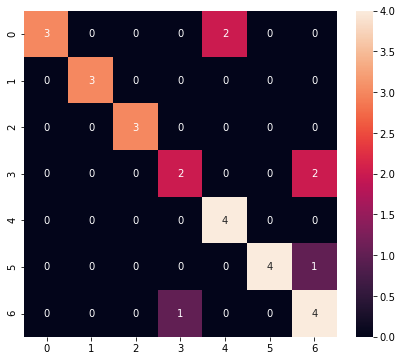

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.67      0.50      0.57         4
           4       0.67      1.00      0.80         4
           5       1.00      0.80      0.89         5
           6       0.57      0.80      0.67         5

    accuracy                           0.79        29
   macro avg       0.84      0.81      0.81        29
weighted avg       0.83      0.79      0.79        29



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\adios\AppData\Local\Temp\tmplt1j21_d\assets


6496

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.07965484 0.00476639 0.00155111 0.00562757 0.02737763 0.37073946
 0.510283  ]
6
